# RoboGarden ML Capstone Project - Credit Card Fraud Detection (Part A)

## *This Project is the course completion submission for the RoboGarden Professional DataScience & Machine Learning Bootcamp.   July 2019*    

## *Objective:  Detect fraudulent credit card transactions based on transaction history.*

### *This is an update of the project with data visualization and classifier optimization on all data features except for time.  Classification using a reduced set of 10 features and undersampling is in Part B, and application of Autoencoders is in Part C.*

## Information:
Description: The dataset consists 284,807 credit card transactions made by European cardholders in September 2013

* Link: https://data.world/raghu543/credit-card-fraud-data

* File: creditcard.csv

* Features: 
    * Time (integer): transaction time (seconds since first transaction)  
    * V1 – V28 (decimal): results of PCA transformation  
    * Amount (decimal): transaction amount  
    * Class (T/F): fraudulent/genuine transaction (target)
* Notes:
    * Feature V1-V28 are the principal components obtained with PCA
    * The original features and background information about the data are not provided due to confidentiality issues
* License: Public domain (CC0)

In [1]:
#Import General Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import livelossplot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load Data
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [4]:
dataset.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Observation: 
#### Features v1 to v28 have a mean near zero, but do not have astandard deviation of 1.  The std. dev. varies between  ~0.3 and ~ 2.  This may not significantly affect results vs. a scaled set, but I will scale these features for consistency.
#### The minimum amount of zero is curious.  How many are there and what do they signify?  e.g. a declined transaction, an identified fraud, a pre-authorization (eg. verifying a CC when signing up for a service for future purchases) or an incomplete transaction (communication failure, etc.).  If zero amount values are related to fraud samples, then training on the amount could be training on the answer.  However, further investigation shows zero amount transactions that are legitimate. There is insufficient information to justify removing the zero amounts.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time      284807 non-null int64
v1        284807 non-null float64
v2        284807 non-null float64
v3        284807 non-null float64
v4        284807 non-null float64
v5        284807 non-null float64
v6        284807 non-null float64
v7        284807 non-null float64
v8        284807 non-null float64
v9        284807 non-null float64
v10       284807 non-null float64
v11       284807 non-null float64
v12       284807 non-null float64
v13       284807 non-null float64
v14       284807 non-null float64
v15       284807 non-null float64
v16       284807 non-null float64
v17       284807 non-null float64
v18       284807 non-null float64
v19       284807 non-null float64
v20       284807 non-null float64
v21       284807 non-null float64
v22       284807 non-null float64
v23       284807 non-null float64
v24       284807 non-null float64
v25       284807 non-null float64
v26    

### All non-null values.  Now investigate for duplicates.

In [6]:
dataset['class'].value_counts()

False    284315
True        492
Name: class, dtype: int64

In [7]:
# Drop Duplicates
df = dataset.drop_duplicates()
df['class'].value_counts()

False    283253
True        473
Name: class, dtype: int64

### There were 1062 (0.37 %) non-fraud duplicates and 19 (4.0 %) fraud duplicates.  After investigating the csv file further, we can see some examples of the duplicates:

### Four identical 150.00 amount legitimate classed transactions are shown below at index 13562 to 13565 with all features having  identical values unlike the surrounding samples.

In [8]:
dataset.loc[13560:13570,:]

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
13560,24050,1.216761,0.698963,-0.137686,2.527629,0.618533,-0.314776,0.486486,-0.303207,0.330209,...,-0.200891,-0.448693,-0.226691,-0.523911,0.793878,0.079119,-0.076812,0.001141,41.51,False
13561,24050,-0.841458,0.918286,1.504540,-0.521650,1.046457,-0.714847,0.855367,-0.089329,0.533366,...,0.029330,0.180174,-0.290965,-0.054860,0.268699,-0.713850,0.041689,0.104671,2.08,False
13562,24050,0.783460,-0.766538,1.331255,1.812482,-0.929991,1.318111,-0.979965,0.472786,2.619051,...,0.027365,0.410787,-0.294227,-0.325263,0.518533,-0.140764,0.042981,0.031839,150.00,False
13563,24050,0.783460,-0.766538,1.331255,1.812482,-0.929991,1.318111,-0.979965,0.472786,2.619051,...,0.027365,0.410787,-0.294227,-0.325263,0.518533,-0.140764,0.042981,0.031839,150.00,False
13564,24050,0.783460,-0.766538,1.331255,1.812482,-0.929991,1.318111,-0.979965,0.472786,2.619051,...,0.027365,0.410787,-0.294227,-0.325263,0.518533,-0.140764,0.042981,0.031839,150.00,False
13565,24050,0.783460,-0.766538,1.331255,1.812482,-0.929991,1.318111,-0.979965,0.472786,2.619051,...,0.027365,0.410787,-0.294227,-0.325263,0.518533,-0.140764,0.042981,0.031839,150.00,False
13566,24052,0.019196,1.060485,2.078401,1.703168,-0.332444,-0.210411,0.065809,-0.106047,0.782455,...,-0.095117,0.090776,0.000921,0.340259,-0.514923,-0.376988,0.136308,0.087016,4.99,False
13567,24052,1.124959,-0.283011,0.454480,0.910154,-0.616918,-0.344330,-0.297557,-0.024893,2.232117,...,-0.472669,-1.231524,-0.007479,-0.242387,0.252636,0.281180,-0.080769,0.011158,79.95,False
13568,24053,-0.254508,1.082387,-0.593772,-0.109728,3.051428,3.289752,0.430333,0.595560,0.318167,...,-0.055309,-0.054035,-0.247829,0.953929,0.024148,-0.338737,-0.005962,0.142277,4.99,False
13569,24053,-0.802007,0.283655,1.559359,-0.032721,0.952904,0.032269,0.046522,0.159000,0.352412,...,0.084018,0.397200,-0.028074,-0.255006,-0.366516,1.096481,0.008451,0.092256,12.50,False


### Six identical 1.00 amount fraud classed transactions are shown below at index 102441 to 102446 with all features having identical values unlike the surrounding samples.

In [9]:
dataset.loc[102440:102450,:]

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
102440,68207,-1.171197,1.039103,1.405342,0.972502,0.220715,-0.928678,0.344191,0.262082,-1.143424,...,0.179758,0.290998,-0.346720,0.435099,0.564471,-0.200885,-0.038164,-0.057133,5.00,False
102441,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102442,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102443,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102444,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102445,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102446,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,True
102447,68208,1.303512,0.062227,-1.297329,-0.479897,2.135302,3.183007,-0.499724,0.803819,-0.074543,...,-0.340246,-1.150620,0.091744,0.946327,0.368241,0.110198,-0.022594,0.024337,5.99,False
102448,68208,-0.131006,0.582856,1.014317,0.444376,0.845495,0.960209,0.338479,0.151942,-0.182027,...,0.191189,0.865940,-0.272396,-1.333896,-0.154556,-0.161314,0.215079,-0.099068,22.72,False
102449,68208,1.302558,0.211005,-1.704663,0.059916,2.559254,3.098005,-0.013022,0.649896,-0.465807,...,-0.043931,-0.258826,-0.189341,1.009328,0.998140,-0.266138,-0.009990,0.006402,14.90,False


In [10]:
# ReIndex df so that there are no missing index values
df.index=range(df.shape[0])

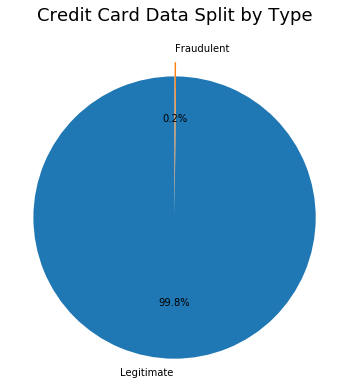

In [11]:
fig1 = plt.figure(figsize = (6,6))
sizes = df['class'].value_counts()
labels = 'Legitimate', 'Fraudulent'
explode = [0, 0.1]
title = 'Credit Card Data Split by Type\n'
plt.title(title, fontsize = 18)
plt.pie(sizes, explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
plt.axis('equal')
plt.show()

## How big is the problem?  What is the total amount of fraudulent transaction?
### *Note*: The data description only says it is European credit card transactions over a 2 day period.  It does not specify the currency (Euros or other), therefore the transactions will only be referred to as amount.

In [12]:
fraud_total = df['amount'][df['class'] == 1].sum()
print(('Total of Fraud transactions is {:,.0f}.').format(fraud_total))

Total of Fraud transactions is 58,591.


In [13]:
normal_total = df['amount'][df['class'] == 0].sum()
print(('Total of Fraud transactions is {:,.0f}.').format(normal_total))

Total of Fraud transactions is 25,043,410.


### Legitimate transactions amount total ~ 12.5 million per day and fraudulent transaction total about 30,000 per day or 0.25% of all transactions. 

# Visualize the Data Features

### What do the fraudulent dollar amounts look like?

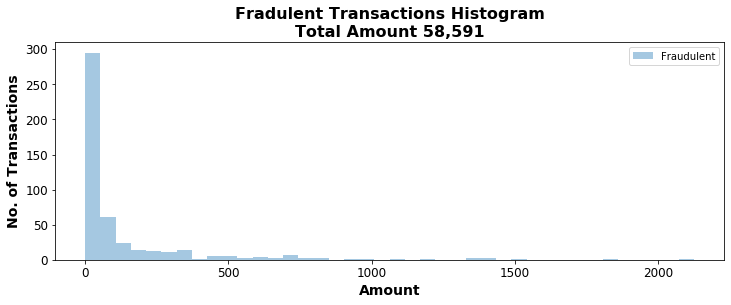

In [14]:
plt.figure(figsize=(12,4)) 
sns.distplot(df['amount'][df['class'] == 1], bins = 40, color = 'tab:blue', label = 'Fraudulent', kde = False)
plt.title(('Fradulent Transactions Histogram\nTotal Amount {:,.0f}').format(fraud_total), weight = 'bold', fontsize = 16)
plt.xlabel('Amount', weight = 'bold', fontsize = 14)
plt.ylabel('No. of Transactions', weight = 'bold', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

### What do the legitimate dollar amounts look like?

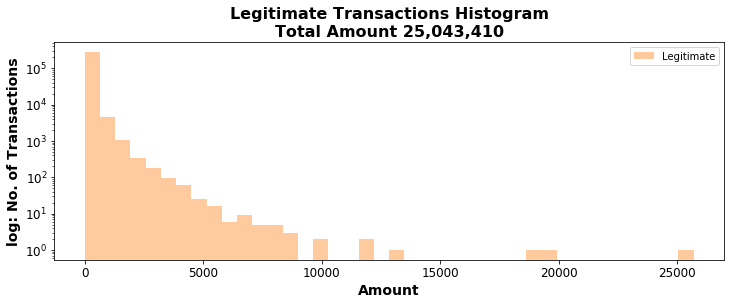

In [15]:
plt.figure(figsize=(12,4)) 
sns.distplot(df['amount'][df['class'] == 0], color = 'tab:orange', bins = 40, label = 'Legitimate', kde = False)
plt.title(('Legitimate Transactions Histogram\nTotal Amount {:,.0f}').format(normal_total), weight = 'bold', fontsize = 16)
plt.xlabel('Amount', weight = 'bold', fontsize = 14)
plt.ylabel('log: No. of Transactions', weight = 'bold', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.yscale('log')
plt.legend()
plt.show()

### When are transactions executed?  Time is seconds from the first transaction in the dataset.

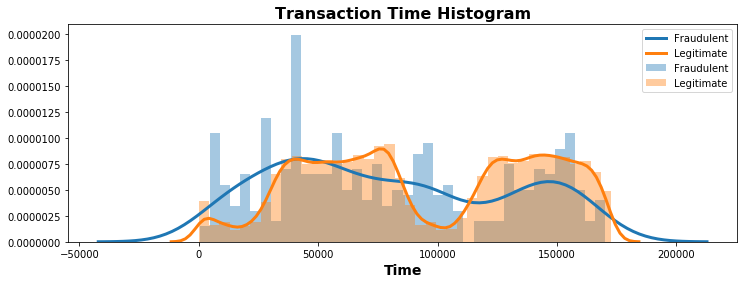

In [16]:
plt.figure(figsize=(12,4))    
sns.distplot(df['time'][df['class'] == 1], bins = 40, label = 'Fraudulent', kde_kws={"lw": 3, "label": "Fraudulent"})
sns.distplot(df['time'][df['class'] == 0], bins = 40, label = 'Legitimate', kde_kws={"lw": 3, "label": "Legitimate"})
plt.title('Transaction Time Histogram', weight = 'bold', fontsize = 16)
plt.xlabel('Time', weight = 'bold', fontsize = 14)
plt.show()

### More proportionate frauds occur in what may be overnight hours, however, the total number of real transactions in these hours are much higher.  This may not be a value added feature unless it is related to an anonymous feature of customer spending habits.



### Plot fraudulent and legitimate transaction distributions for anonymous features.

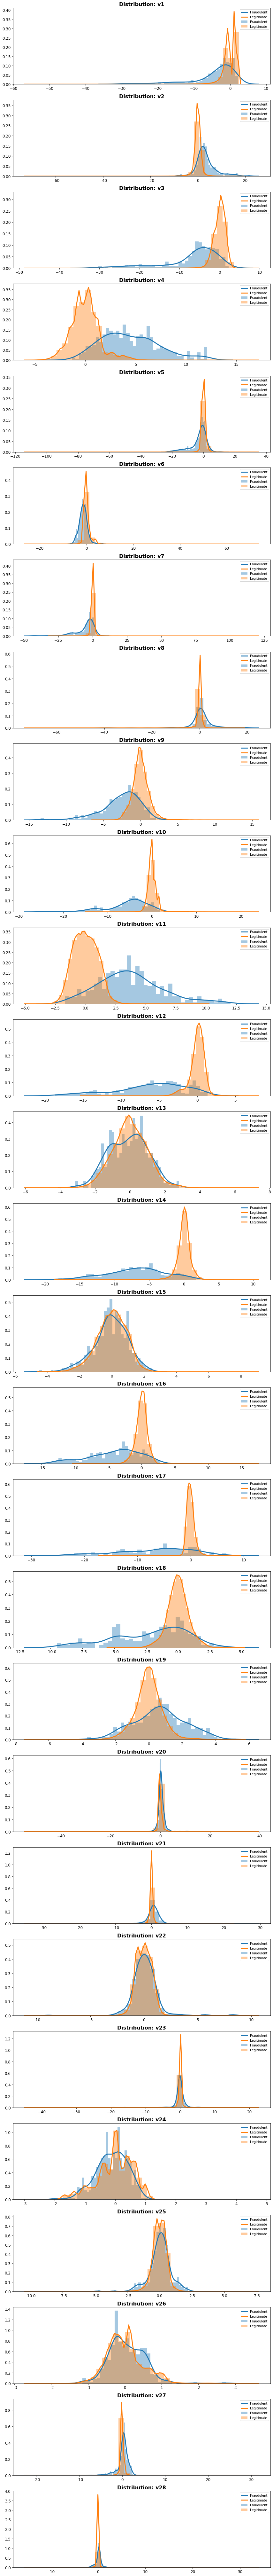

In [17]:
column_names = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28']
plt.figure(figsize=(12,28*4))

gs = gridspec.GridSpec(28, 1)

for  i, col_val in enumerate(column_names):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col_val][df['class'] == 1], bins = 40, label = 'Fraudulent',
                 kde_kws={"lw": 3, "label": "Fraudulent"})
    sns.distplot(df[col_val][df['class'] == 0], bins = 40, label = 'Legitimate',
                 kde_kws={"lw": 3, "label": "Legitimate"})
    ax.set_title('Distribution: ' + col_val, weight = 'bold', fontsize = 16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('', fontsize = 28)
plt.tight_layout()

### Visualize features where the distribution of fraudulent transactions varies from normal transactions.

In [18]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


In [19]:
def scatR(F1, F2, F3, F4):
    plt.figure(figsize=(16,7))
    gs = gridspec.GridSpec(1, 2)
    
    ax1 = plt.subplot(gs[0])
    plt.title((('Feature {} vs. Feature {}').format(F1, F2)), fontsize = 14, weight = 'bold')
    plt.scatter(x = dataset[F1][dataset['class'] == 0], y = dataset[F2][dataset['class'] == 0],
                label = 'Real', c = 'orange', alpha = 0.4)
    plt.scatter(x = dataset[F1][dataset['class'] == 1], y = dataset[F2][dataset['class'] == 1],
               label = 'Fraud', c = 'b', alpha = 0.4)
    plt.xlabel(F1, fontsize = 14, weight = 'bold')
    plt.ylabel(F2, fontsize = 14, weight = 'bold')    
    plt.legend()
    plt.grid('black')

    ax2 = plt.subplot(gs[1])
    plt.title((('Feature {} vs. Feature {}').format(F3, F4)), fontsize = 14, weight = 'bold')
    plt.scatter(x = dataset[F3][dataset['class'] == 0], y = dataset[F4][dataset['class'] == 0]
                , label = 'Real', c = 'orange', alpha = 0.4)
    plt.scatter(x = dataset[F3][dataset['class'] == 1], y = dataset[F4][dataset['class'] == 1],
                 label = 'Fraud', c = 'b', alpha = 0.4)
    plt.xlabel(F3, fontsize = 14, weight = 'bold')
    plt.ylabel(F4, fontsize = 14, weight = 'bold')    
    plt.legend()
    plt.grid('black')
    plt.show()

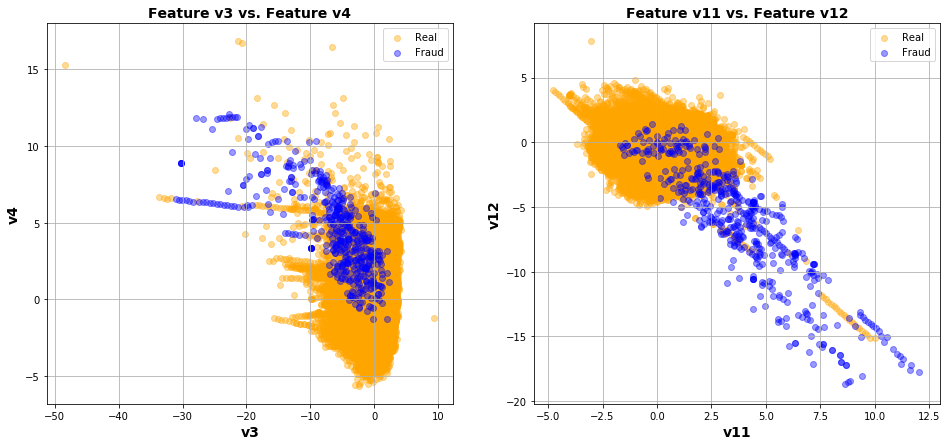

In [20]:
scatR('v3','v4','v11','v12')

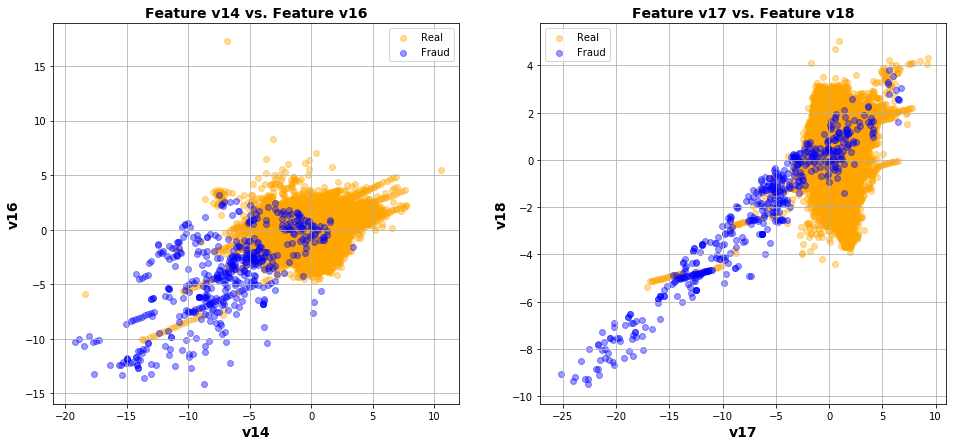

In [21]:
scatR('v14','v16','v17','v18')

In [22]:
def scat3D(Fa,Fb,Fc):
    fig = plt.figure(figsize=(12, 10))
    #ax.set_facecolor('white')
    ax = fig.add_subplot(111, projection='3d', facecolor ='white')
    
    xs = df[Fa][df['class'] == 0]
    ys = df[Fb][df['class'] == 0]
    zs = df[Fc][df['class'] == 0]
    ax.scatter(xs, ys, zs, label = 'Normal', c = 'orange', s=100, alpha=0.5, edgecolors='w')

    us = df[Fa][df['class'] == 1]
    vs = df[Fb][df['class'] == 1]
    ws = df[Fc][df['class'] == 1]    
    ax.scatter(us, vs, ws, label = 'Fraud', c = 'b', s=100, alpha=0.5, edgecolors='w')

    ax.set_title((('3 Dimension Feature Plot: {}, {}, & {}\n').format(Fa,Fb,Fc)), weight = 'bold', fontsize = 16, c = 'w' )
    ax.set_xlabel(Fa, weight = 'bold', fontsize = 12)
    ax.set_ylabel(Fb, weight = 'bold', fontsize = 12)
    ax.set_zlabel(Fc, weight = 'bold', fontsize = 12)
    plt.legend(loc = 'center left')
    plt.grid('black')


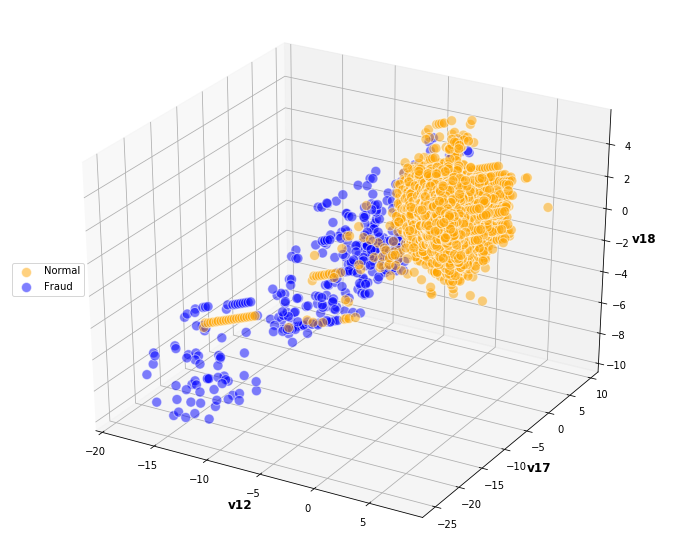

In [23]:
scat3D('v12','v17','v18')

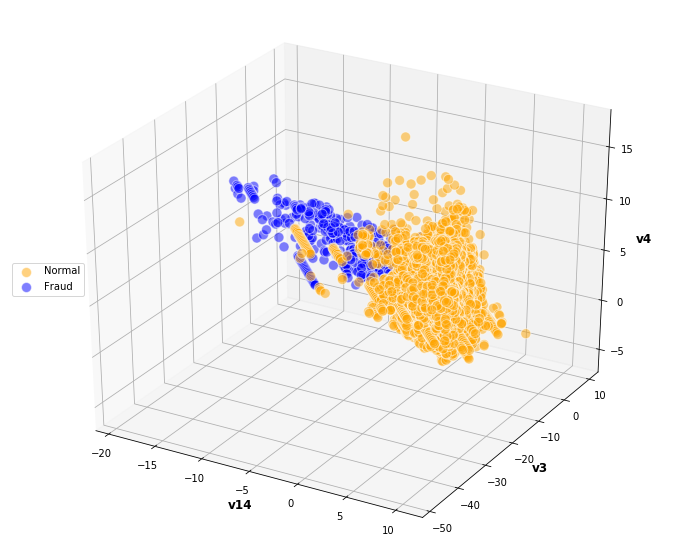

In [24]:
scat3D('v14','v3','v4')

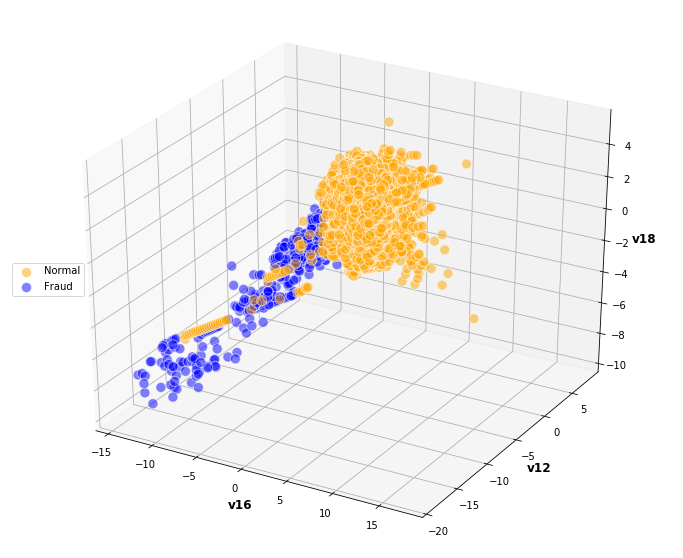

In [25]:
scat3D('v16','v12','v18')

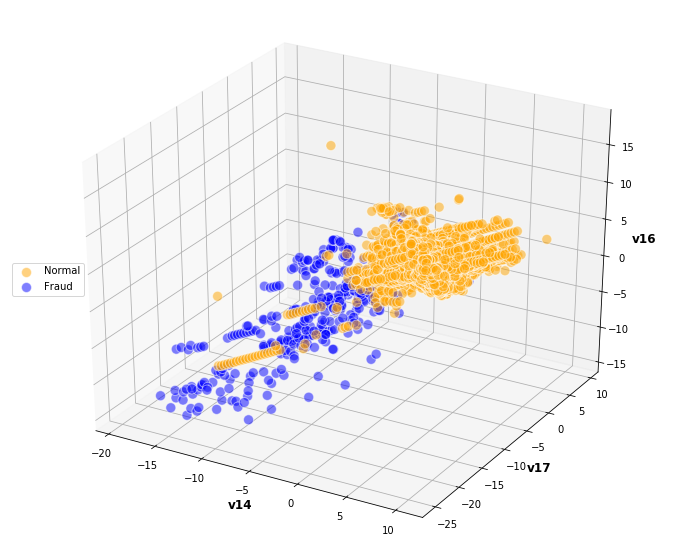

In [26]:
scat3D('v14','v17','v16')

## Conclusion:
### Some features distinguish a majority of fraudulent transactions from legitimate ones.  Where a sample's fraudulent transaction feature is within the range of normal transactions, other features of that sample may be outside of normal.  

### Move forward with a full feature set to investigate difference in model performance on all features and compare with performance using a selective subset of features that show a distribution variance for fraudulent data.
#   

## *Start with the complete set, drop the 'time' feature and split into train & test subsets and preserve the ratio of fraudulent samples in both using "stratify" in train_test_split.*  

In [27]:
y = df['class']
y.shape

(283726,)

In [28]:
dfx = df.drop(['time','class'], axis = 1)
dfx.shape

(283726, 29)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(dfx,y, stratify = y, test_size = 0.25, random_state = 6)

In [30]:
y_train.value_counts()

False    212439
True        355
Name: class, dtype: int64

In [31]:
y_test.value_counts()

False    70814
True       118
Name: class, dtype: int64

### Retain number of positives & negatives from train & test sets for use in calculating classification counts for changing decision thresholds.

In [32]:
N, P = y_test.value_counts()
Ntr, Ptr = y_train.value_counts()
N, P, Ntr, Ptr

(70814, 118, 212439, 355)

In [33]:
Test_Set = x_test  # Reserve a copy of x_test that is not scaled so that the actual amounts can be referenced

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### The test and train sets are complete and cover the entire population and are balanced with an equal proportion of fraud samples in each set.
#  

## Prepare functions for plots and reports

In [35]:
def Prob_Hist(model_name,probs):
    plt.figure(figsize=(12,4)) 
    sns.distplot(probs[:,1], bins = 100, color = 'tab:red', label = 'Sample Probability ', kde = False)
    plt.title((('Histogram of Prediction Probability for {}').format(model_name)), weight = 'bold', fontsize = 16)
    plt.xlabel('Classifier Probability', fontsize = 14)
    plt.ylabel( 'Log No. of Samples')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [36]:
def ROC_Plot(model_name, y_test, y_pred, probs, P, N):

    fpr_, tpr_, thresholds_ = roc_curve(y_test, probs[:,1])
    roc_auc = auc(fpr_, tpr_)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    plt.title((('{}\nReceiver Operating Characteristic').format(model_name)), weight = 'bold', fontsize = 16)
    plt.plot(fpr_, tpr_, 'purple', lw = '3', label='ROCAUC = %0.2f'% roc_auc)
    plt.scatter(fpr[1], tpr[1],s = 100, c = 'r', label = ('Conf. Matrix: {:0.1e}, {:0.2f}').format(fpr[1], tpr[1]))
    plt.plot([0,1],[0,1],'r--')
    
    plt.legend(loc='lower right', fontsize = 12)
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.0,1.01])
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.ylabel('True Positive Rate', weight = 'bold', fontsize = 14)
    plt.xlabel('False Positive Rate', weight = 'bold', fontsize = 14)
    plt.grid('black')

    return fpr_, tpr_, thresholds_

In [37]:
def PRC_Plot(model_name, y_test, y_pred, probs, P, N):

    precision_, recall_, _ = precision_recall_curve(y_test, probs[:,1])
    AP = average_precision_score(y_test, probs[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    single_pt_recall = tpr[1]
    single_pt_precision = (tpr[1]*P)/(tpr[1]*P + fpr[1]*N)
    
    plt.title((('{}\nPrecision - Recall Curve').format(model_name)), weight = 'bold', fontsize = 16)
    plt.step(recall_, precision_, 'blue', lw = '3', where = 'pre', label='au_prc = %0.2f'% AP)
    plt.scatter(single_pt_recall, single_pt_precision, s = 100, c = 'r', label = ('Conf. Matrix: {:0.2f}, {:0.2f}').format(single_pt_recall, single_pt_precision))
      
    plt.legend(loc='lower left', fontsize = 12)
    plt.xlim([-0.01,1.01])
    plt.ylim([-0.0,1.01])
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.ylabel('Precision', weight = 'bold', fontsize = 14)
    plt.xlabel('Recall', weight = 'bold', fontsize = 14)
    plt.grid('black')

    return

In [38]:
def Det_Amt_PLot(model_name, Test_set, y_test, y_pred):
    # Calculate the amount of fraud detected, missed, and false positive
    fraud_amount_IDd = Test_set

    fraud_amount_IDd['TP'] = 0
    fraud_amount_IDd['FP'] = 0
    fraud_amount_IDd['FN'] = 0
    
    fraud_amount_IDd['pred'] = y_pred
    fraud_amount_IDd['ytest'] = y_test
    
    fraud_amount_IDd['TP'] = fraud_amount_IDd['pred'] * fraud_amount_IDd['ytest']
    fraud_amount_IDd['FP'] = fraud_amount_IDd['pred'] * (fraud_amount_IDd['ytest'] == 0)
    fraud_amount_IDd['FN'] = (fraud_amount_IDd['pred'] == 0) * fraud_amount_IDd['ytest']

    fraud_amount_IDd['fraudIDd'] = fraud_amount_IDd['amount'] * fraud_amount_IDd['TP']
    fraud_amount_IDd['False_+ve'] = fraud_amount_IDd['amount'] *fraud_amount_IDd['FP']
    fraud_amount_IDd['fraud_notIDd'] = fraud_amount_IDd['amount'] * fraud_amount_IDd['FN']
    
    # PLot histogram of fraud detected, missed, and false positives
    plt.figure(figsize=(12,4))
    sns.distplot(fraud_amount_IDd['fraudIDd'][fraud_amount_IDd['TP'] == 1], bins = 40, color = 'tab:blue', label = 'Fraud Identified', kde = False) 
    sns.distplot(fraud_amount_IDd['fraud_notIDd'][fraud_amount_IDd['FN'] == 1], bins = 40, color = 'tab:orange', label = 'False -ve', kde = False)
    sns.distplot(fraud_amount_IDd['False_+ve'][fraud_amount_IDd['FP'] == 1], bins = 40, color = 'tab:red', label = 'False +ve', kde = False)
    
    plt.title((('Histogram of FP, TP, & FN Amounts for {}').format(model_name)), weight = 'bold', fontsize = 16)
    plt.xlabel('Amount', fontsize = 14)
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    # Print Sums
    fraudIDd = fraud_amount_IDd['fraudIDd'].sum()
    fraud_notIDd = fraud_amount_IDd['fraud_notIDd'].sum()
    false_pos_total = fraud_amount_IDd['False_+ve'].sum()
    print(('Fraud total identified is {:.{prec}f},\nFraud total missed is {:.{prec}f},\nNormal total misclassified is {:.{prec}f}').format(fraudIDd,fraud_notIDd, false_pos_total, prec = 2))

## Loop through several classifiers primarily using default hyperparameters to identify candidates to further optimize.

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from time import time

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, f1_score
from inspect import signature

In [40]:
models = [('LR',LogisticRegression(random_state = 6)),('SGD',SGDClassifier(loss = 'log', max_iter = 1000, random_state = 6)),
          ('RFC', RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 6, n_jobs = -1)),
          ('ADB',AdaBoostClassifier(random_state = 6)),('SVC',SVC(kernel = 'rbf', probability = True, max_iter = 1000, random_state = 6)),
          ('GNB',GaussianNB()),('QDA',QuadraticDiscriminantAnalysis()),
          ('MLP',MLPClassifier(hidden_layer_sizes = 50, activation = 'relu',solver = 'adam', batch_size = 1000, max_iter = 200, random_state = 6))]

start = time()
for name, model in models:
    iter_start = time()
    clf = model.fit(x_train, y_train)
        
    y_pred, probs = clf.predict(x_test), clf.predict_proba(x_test)

    AU_PRC = average_precision_score(y_test, probs[:,1])
    F1_score = f1_score(y_test, y_pred)

    print(('model: {} gives Area under PR Curve of {:.3f} and F1 Score of {:.3f}, duration of {:.2f} minutes.').format(name, AU_PRC, F1_score, (time() - iter_start)/60))

print(('elapsed time of {:.2f} minutes').format((time() - start)/60))

model: LR gives Area under PR Curve of 0.776 and F1 Score of 0.721, duration of 0.08 minutes.
model: SGD gives Area under PR Curve of 0.738 and F1 Score of 0.674, duration of 0.02 minutes.
model: RFC gives Area under PR Curve of 0.846 and F1 Score of 0.845, duration of 1.61 minutes.
model: ADB gives Area under PR Curve of 0.796 and F1 Score of 0.763, duration of 2.10 minutes.
model: SVC gives Area under PR Curve of 0.798 and F1 Score of 0.746, duration of 6.53 minutes.
model: GNB gives Area under PR Curve of 0.082 and F1 Score of 0.107, duration of 0.01 minutes.
model: QDA gives Area under PR Curve of 0.128 and F1 Score of 0.103, duration of 0.02 minutes.
model: MLP gives Area under PR Curve of 0.827 and F1 Score of 0.853, duration of 0.33 minutes.
elapsed time of 10.69 minutes


### Drop GaussianNB and QuadraticDiscriminantAnalysis.  The other classifiers may improve with optimization.

### Functions for plots and reports for each optimization.

In [49]:
def Conf_Matrix(_title, cm):
    sns.set(font_scale=1.4)
    plt.title(('{}\n Confusion Matrix').format(_title))
    c_map = ['blue',  'orange']
    sns.heatmap(cm, cmap = c_map,  annot=True, fmt = 'g', annot_kws={"size": 24, "weight": 'bold'})
    plt.xlabel('Normal                  Fraud\nPredicted')
    plt.ylabel('Actual\n Fraud            Normal')
   
    return

In [42]:
# PLot for True Positive Counts vs. Decision Threshold
def FP_TP_Count_vs_Threshold(model_name, fpr_, tpr_, thresholds_, P, N, ylim, DT):
    plt.step(thresholds_, tpr_*P, c='blue', lw = '3', where = 'mid', label = 'True +ve')
    plt.step(thresholds_, fpr_*N, c='orange', lw = '3', where = 'mid', label = 'False +ve')
    plt.plot([DT,DT],[0,ylim], 'r--')
    plt.ylim(-0.01, ylim)
    plt.xlim(-0.01, 1.01)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title(('{}\n FP & TP Count vs. Decision Threshold').format(model_name), weight = 'bold', fontsize = 16)
    plt.ylabel('FP Count, TP Count', weight = 'bold', fontsize=14)
    plt.xlabel('Classifier Decision Threshold, Default = 0.5', weight = 'bold', fontsize=14)
    plt.legend()
    plt.grid('black')
    return


In [43]:
# Single Call for combined ROC & Precision-Recall Curve, plus False Positive / True Positive Counts vs. Decision Threshold
def ROC_Pre_Count_Plots(title, y_test, y_pred, probs, cm, P, N, DT):
        
    plt.figure(figsize=(12,6))
    gs0 = gridspec.GridSpec(1, 2)    
    ax1 = plt.subplot(gs0[0])    
    fpr_, tpr_, thresholds_ = ROC_Plot(title, y_test, y_pred, probs, P, N)

    ax2 = plt.subplot(gs0[1])     
    PRC_Plot(title, y_test, y_pred, probs, P, N)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12,6))
    gs1 = gridspec.GridSpec(1, 2)   
    ax3 = plt.subplot(gs1[0])
    Conf_Matrix(title, cm)

    ax4 = plt.subplot(gs1[1])
    FP_TP_Count_vs_Threshold(title, fpr_, tpr_, thresholds_, P, N, P+7, DT)
    plt.tight_layout()
    plt.show()

In [44]:
# Function to get reports from optimizations
def GetResults(title, clf, x_test, y_test, P, N, flag, DT): 
    if flag == 1:
        print(clf.best_estimator_.get_params())
    elif flag == 0:   
        print('model parameters: ',clf.get_params())
    else:
        print(' ')
    
    y_pred, probs = clf.predict(x_test),  clf.predict_proba(x_test)
    cm, AU_PRC = confusion_matrix(y_test, y_pred),  average_precision_score(y_test, probs[:,1])
    F1 = f1_score(y_test, y_pred)
    
    print(('\n{} gives AU_PRC of {:.3f}and F1 Score of {:.3f}\n').format(title, AU_PRC, F1))
    
    ROC_Pre_Count_Plots(title, y_test, y_pred, probs, cm, P, N, DT)

    return y_pred, probs, F1

In [45]:
def FP_TP_Count_Table(model_name, fpr_, tpr_, thresholds_, P, N, range_):
    print('{:^65}'.format('ROC Curve TP & FP Count by Classifier Decision Threshold:'))
    print(('{:^65}\n').format(model_name))
    print('-'*65)
    print(('{:>5}{:>12}{:>12}{:>12}{:>12}{:>12}').format('i', 'Threshold', 'TPR  ', 'TP Count', 'FPR   ', 'FP Count'))
    print('-'*65)
    for i in range(range_):        
        print(('{:>5}{:{width}.{prec}f}{:{width}.{prec}f}{:{width}.{prec2}f}{:{width}.{prec2}e}{:{width}.{prec2}f}').format(i, thresholds_[i], tpr_[i], tpr_[i]*P, fpr_[i], fpr_[i]*N, width =12, prec = 3, prec2 =1)) 

## Optimize LR, SGD, RFC, ADB, & SVC to determine if the performance can be improved.


#  *Logistic Regression*

## Optimize using a loop due to conflicts with solvers and penalty options.

In [46]:
# Iterate through combinations due to limits with penalty - solver combinations
start = time()
solvR = ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']
saga_penalty = ['l1', 'l2', 'elasticnet']
l1_Ratio={'l1':'none', 'l2':'none', 'elasticnet':0.5}
liblin_penalty = ['l1', 'l2'] 
other_penalty = ['l2']
c_ = [0.5, 1, 5]
best_AU_PRC =0
best_param = []
print(('{:<12}{:<12}{:<4}').format('solver', 'penalty', 'C'))
for sol in solvR:
    if sol == 'saga':     #Only saga solver works withs all three penalties
        _penalty = saga_penalty
    elif sol == 'liblinear':     #liblinear solver works withs two penalties
        _penalty = liblin_penalty
    else:
        _penalty = other_penalty 
    for pen in _penalty:        
        for num in c_:
            loop_clf = LogisticRegression(penalty = pen, C = num, solver = sol, max_iter = 200, random_state = 6,l1_ratio = l1_Ratio[pen], n_jobs = -1)
            loop_clf.fit(x_train, y_train)
            y_pred, probs = loop_clf.predict(x_test), loop_clf.predict_proba(x_test)
            
            AU_PRC = average_precision_score(y_test, probs[:,1])
            F1_score = f1_score(y_test, y_pred)
            print(('{:<12}{:<12}{:<4}   AU-PRC:  {:.6f}  F1 Score:  {:.3f}').format(sol, pen, num, AU_PRC, F1_score))
            if AU_PRC>best_AU_PRC:
                best_AU_PRC = AU_PRC
                best_F1 = F1_score
                best_param = [sol, pen, num]
                clf = loop_clf
    print(('{:<12}{:<5}  duration of {:.2f} minutes').format(sol, pen, (time() - start)/60))

print(('Best Area under PR Curve of {:.3f} with F1 Score {:.3f} is from parameters solver: {}, penalty: {}, c:, {}').format(best_AU_PRC, best_F1, best_param[0], best_param[1], best_param[2]))
print(('Elapsed time of {:.2f} minutes').format((time() - start)/60))

solver      penalty     C   
liblinear   l1          0.5    AU-PRC:  0.775997  F1 Score:  0.721
liblinear   l1          1      AU-PRC:  0.775086  F1 Score:  0.721
liblinear   l1          5      AU-PRC:  0.774096  F1 Score:  0.721
liblinear   l2          0.5    AU-PRC:  0.777869  F1 Score:  0.724
liblinear   l2          1      AU-PRC:  0.776245  F1 Score:  0.721
liblinear   l2          5      AU-PRC:  0.774402  F1 Score:  0.721
liblinear   l2     duration of 0.86 minutes
newton-cg   l2          0.5    AU-PRC:  0.774463  F1 Score:  0.721
newton-cg   l2          1      AU-PRC:  0.774153  F1 Score:  0.721
newton-cg   l2          5      AU-PRC:  0.774097  F1 Score:  0.721
newton-cg   l2     duration of 1.98 minutes
lbfgs       l2          0.5    AU-PRC:  0.774463  F1 Score:  0.721
lbfgs       l2          1      AU-PRC:  0.774153  F1 Score:  0.721
lbfgs       l2          5      AU-PRC:  0.774099  F1 Score:  0.721
lbfgs       l2     duration of 2.65 minutes
sag         l2          0.5    AU-P

### The area under the Precision-Recall Curve improved from 0.776 to 0.791.  The best AU-PRC has a slightly lower F1 score than other runs, however, that is based only on the <0.5< decision threshold and not the range of decision threshold probabilities.  Therefore, choose the model with the highest AU_PRC. 

### Results report:

model parameters:  {'C': 0.5, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'multi_class': 'warn', 'n_jobs': -1, 'penalty': 'elasticnet', 'random_state': 6, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Logistic Regression gives AU_PRC of 0.791and F1 Score of 0.691



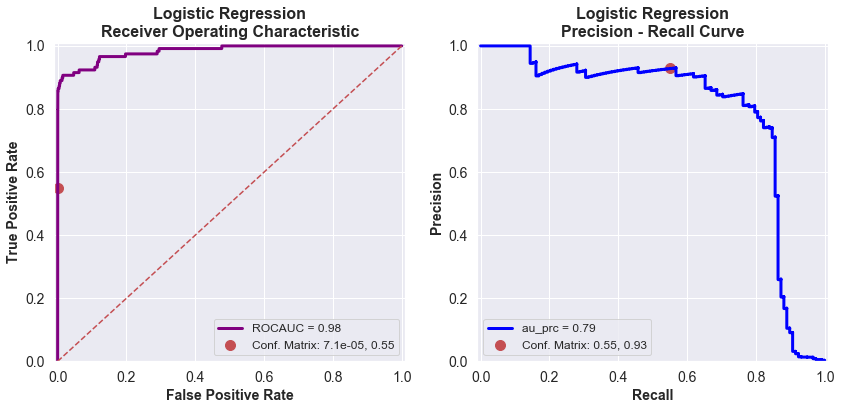

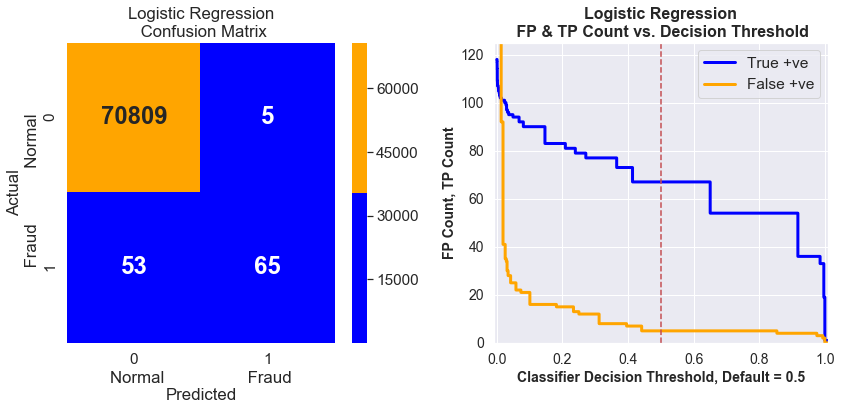

In [50]:
best_LR_model = clf
y_pred, probs, F1_Score = GetResults('Logistic Regression',best_LR_model, x_test, y_test, P, N, 0, 0.5)

### For Logistic Regression, the False Positive / True Positive Count plot  shows a slightly steeper slope beteen the two curves less than 0.5.  Reducing the decision threshold to 0.11 will increase True Positives (frauds) to  90 and  increase FP's to 16.



# *SGD*
### Run SGD with Calibrated Classifier CV to get probabilities for all loss functions.  Run all SGD loss functions with penalties combined with method, and cv from Calibrated Classifier CV to evaluate performance.

In [51]:
# Loop to collect data for multiple ROC curves, Wrap SGD in CalibratedClassifierCV to get probabilities for all LF's
from sklearn.calibration import CalibratedClassifierCV
_loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',   # Standard classification loss parameters
         'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']  # Non-Standard loss parameters
_penalty = ['l1','l2','elasticnet']
_method = ['sigmoid','isotonic']
_cv = [2,3]
 
start = time()
for pram in _loss: #Pre-fit all loss functions before CalibratedClassifierCV
    iter_start = time()
    best_AU_PRC = 0
    best_F1 = 0
    best_param = []
    for pen in _penalty:
        for func in _method:
            for num in _cv:
                model = SGDClassifier(loss = pram, penalty=pen, max_iter=200, random_state = 6, verbose = 0)
                model.fit(x_train, y_train)
                loop_clf = CalibratedClassifierCV(model, cv = num, method=func)  # Wrap model to be able to use "predict_proba"
                loop_clf.fit(x_train, y_train)   # Fit with CalibratedClassifierCV

                y_pred, probs = loop_clf.predict(x_test), loop_clf.predict_proba(x_test)

                AU_PRC = average_precision_score(y_test, probs[:,1])
                F1_score = f1_score(y_test, y_pred)
                if AU_PRC>best_AU_PRC:
                    best_AU_PRC = AU_PRC
                    best_F1 = F1_score
                    best_param = [pen, func, num]
                    clf = loop_clf
                    
    print(('SGD loss fcn {} gives Area under PR Curve of {:.3f} & F1 Score of {:.3f}, duration of {:.2f} minutes.').format(pram, best_AU_PRC, best_F1, (time() - iter_start)/60))
    print(('       Best params are penalty: {}, method: {}, cv: {}').format(best_param[0], best_param[1], best_param[2]))
print(('elapsed time of {:.2f} minutes').format((time() - start)/60))


SGD loss fcn hinge gives Area under PR Curve of 0.752 & F1 Score of 0.670, duration of 0.93 minutes.
       Best params are penalty: l2, method: sigmoid, cv: 3
SGD loss fcn log gives Area under PR Curve of 0.754 & F1 Score of 0.731, duration of 1.36 minutes.
       Best params are penalty: elasticnet, method: isotonic, cv: 2
SGD loss fcn modified_huber gives Area under PR Curve of 0.742 & F1 Score of 0.731, duration of 5.09 minutes.
       Best params are penalty: elasticnet, method: isotonic, cv: 2
SGD loss fcn squared_hinge gives Area under PR Curve of 0.741 & F1 Score of 0.761, duration of 5.03 minutes.
       Best params are penalty: l2, method: isotonic, cv: 3
SGD loss fcn perceptron gives Area under PR Curve of 0.756 & F1 Score of 0.772, duration of 0.91 minutes.
       Best params are penalty: l2, method: isotonic, cv: 3
SGD loss fcn squared_loss gives Area under PR Curve of 0.791 & F1 Score of 0.798, duration of 1.88 minutes.
       Best params are penalty: l2, method: isotonic

### SGD with squared loss improved area under the Precision-Recall Curve from 0.738 to 0.791. 

### Refit with best parameters (CalibratedClassifier does not return best parameters).

### Result report:


In [52]:
model = SGDClassifier(loss = 'squared_loss', penalty='l2', max_iter=200, random_state = 6, verbose = 0).fit(x_train, y_train)
clf = CalibratedClassifierCV(model, cv = 3, method='isotonic').fit(x_train, y_train)

model parameters:  {'base_estimator__alpha': 0.0001, 'base_estimator__average': False, 'base_estimator__class_weight': None, 'base_estimator__early_stopping': False, 'base_estimator__epsilon': 0.1, 'base_estimator__eta0': 0.0, 'base_estimator__fit_intercept': True, 'base_estimator__l1_ratio': 0.15, 'base_estimator__learning_rate': 'optimal', 'base_estimator__loss': 'squared_loss', 'base_estimator__max_iter': 200, 'base_estimator__n_iter_no_change': 5, 'base_estimator__n_jobs': None, 'base_estimator__penalty': 'l2', 'base_estimator__power_t': 0.5, 'base_estimator__random_state': 6, 'base_estimator__shuffle': True, 'base_estimator__tol': 0.001, 'base_estimator__validation_fraction': 0.1, 'base_estimator__verbose': 0, 'base_estimator__warm_start': False, 'base_estimator': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_loss',
    

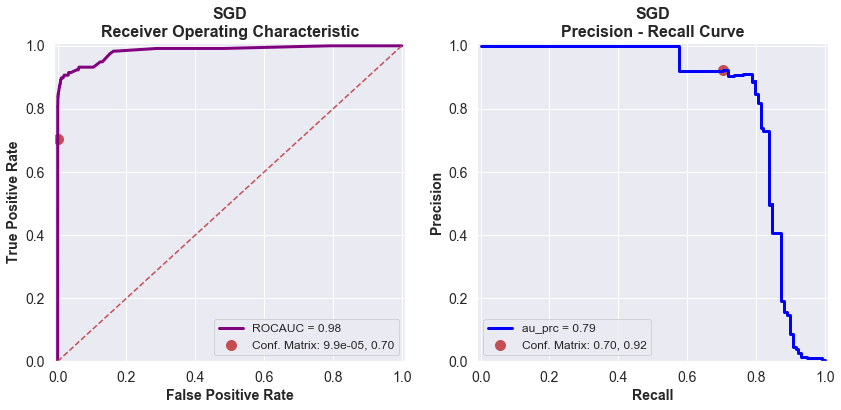

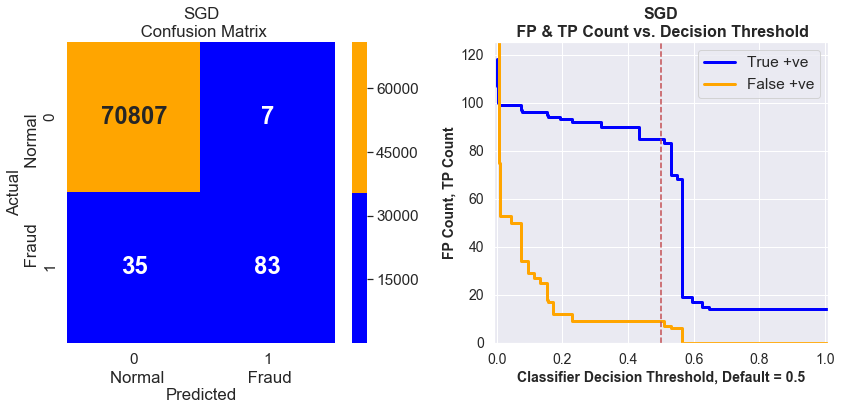

In [53]:
best_SGD_model = clf
y_pred, probs, F1_Score = GetResults('SGD',best_SGD_model, x_test, y_test, P, N, 0, 0.5)

### SGD has a good True Positive count in the confusion matrix (at the 0.5 default decision threshold), and it has a good Area under the P-R Curve score.   The FP / TP Count plot below shows that a decrease in the decision threshold to 0.21  will increase frauds identified to 93 while only increasing FP's to 9 as detailed in the threshold count table below.

In [54]:
fpr_, tpr_, thresholds_ = roc_curve(y_test, probs[:,1])
FP_TP_Count_Table('SGD Classifier', fpr_, tpr_, thresholds_, P, N, 13)

    ROC Curve TP & FP Count by Classifier Decision Threshold:    
                         SGD Classifier                          

-----------------------------------------------------------------
    i   Threshold       TPR      TP Count      FPR       FP Count
-----------------------------------------------------------------
    0       1.667       0.000         0.0     0.0e+00         0.0
    1       0.667       0.119        14.0     0.0e+00         0.0
    2       0.627       0.127        15.0     0.0e+00         0.0
    3       0.626       0.144        17.0     0.0e+00         0.0
    4       0.565       0.161        19.0     0.0e+00         0.0
    5       0.562       0.576        68.0     8.5e-05         6.0
    6       0.538       0.593        70.0     8.5e-05         6.0
    7       0.525       0.703        83.0     9.9e-05         7.0
    8       0.493       0.720        85.0     1.3e-04         9.0
    9       0.373       0.763        90.0     1.3e-04         9.0
   10    

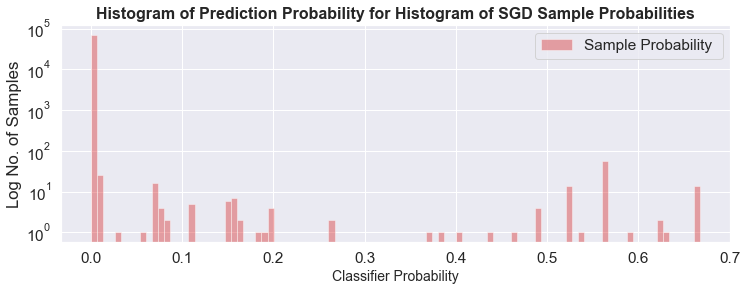

In [55]:
 Prob_Hist('Histogram of SGD Sample Probabilities',probs)

# *Random Forest Classifier*

## Optimize with Random Search

In [86]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':[50,75,100,125,150], 'max_depth':[10, 20, 40, 50],'criterion':['gini', 'entropy']}

model = RandomForestClassifier(random_state = 6)
clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=3, verbose=1, return_train_score=True)

clf.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 41.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [87]:
clf.best_params_

{'n_estimators': 50, 'max_depth': 10, 'criterion': 'entropy'}

## Result report:

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 6, 'verbose': 0, 'warm_start': False}

Random Forest gives AU_PRC of 0.856and F1 Score of 0.845



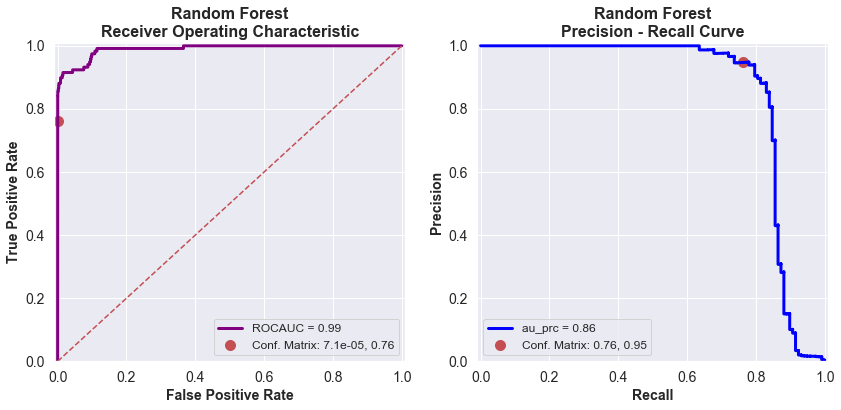

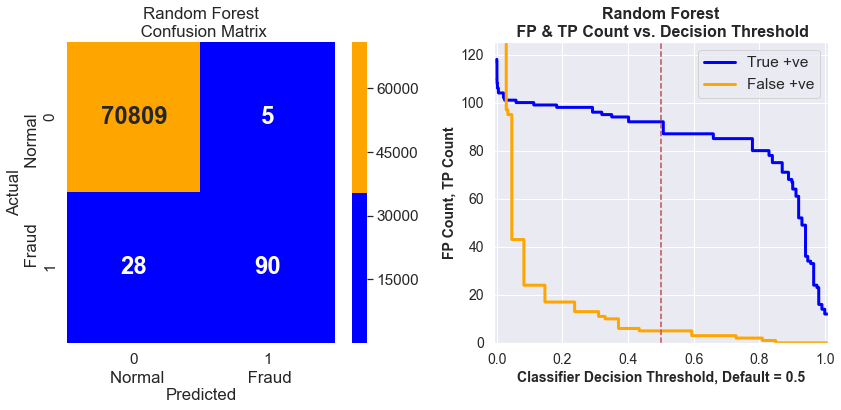

In [88]:
best_RFC_model = clf
y_pred, probs, F1_Score = GetResults('Random Forest',best_RFC_model, x_test, y_test, P, N, 1, 0.5)

### Optimizing increased AU-PRC score marginally from 0.846 to 0.855.  The FP & TP Count chart shows that decreasing the decision threshold to about 0.1 will only increase true positives by 8 while increasing false positives by about 20.  The default threshold has a trade off ratio of 23:1 for TP:FP.

### Get feature importance to use to select features to drop.  RandomSearchCV "has no attribute feature_importances", so fit RF again and extract Feature Importance results.

In [61]:
model = RandomForestClassifier(n_estimators = 150, max_depth = 50, criterion = 'entropy', random_state = 6).fit(x_train, y_train)

In [62]:
FI = (model.feature_importances_)
cols = dfx.columns
for i in range(0,28,4):
    print(('{:^10} {:.2f}{:^9}{:.2f}{:^9}{:.2f}{:^9}{:.2f}').format(cols[i], FI[i]*100, cols[i+1], FI[i+1]*100, cols[i+2], FI[i+2]*100, cols[i+3], FI[i+3]*100))
print(('{:^9}{:.3f}').format(cols[28], FI[28]*100))

    v1     1.00   v2    1.32   v3    3.65   v4    4.18
    v5     0.94   v6    1.23   v7    3.01   v8    1.02
    v9     2.07   v10   11.03   v11   5.37   v12   10.08
   v13     0.84   v14   20.71   v15   0.78   v16   6.46
   v17     13.00   v18   1.98   v19   1.29   v20   1.17
   v21     1.31   v22   0.73   v23   0.68   v24   0.67
   v25     0.83   v26   1.18   v27   1.26   v28   0.99
 amount  1.239


### Top 10 order of importance: v14, v17, v10, v12, v16, v11, v4, v3, v7, v9

# *AdaBoost Classifier*

In [63]:
params={'n_estimators':[25, 50, 100, 200], 'learning_rate':[0.1, 0.5, 1, 1.5]}

model = AdaBoostClassifier(random_state = 6)
clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=2, verbose=1, return_train_score=True)

clf.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 17.9min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=6),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.1, 0.5, 1, 1.5],
                                        'n_estimators': [25, 50, 100, 200]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=1)

In [64]:
clf.best_params_

{'n_estimators': 200, 'learning_rate': 1.5}

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.5, 'n_estimators': 200, 'random_state': 6}

AdaBoost Classifier gives AU_PRC of 0.802and F1 Score of 0.800



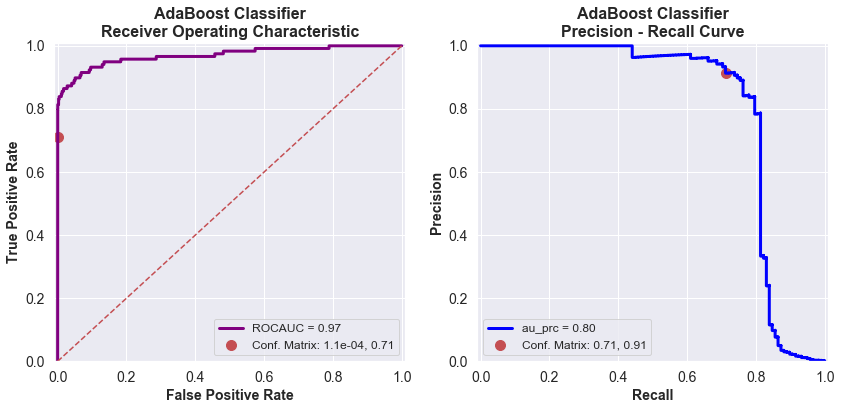

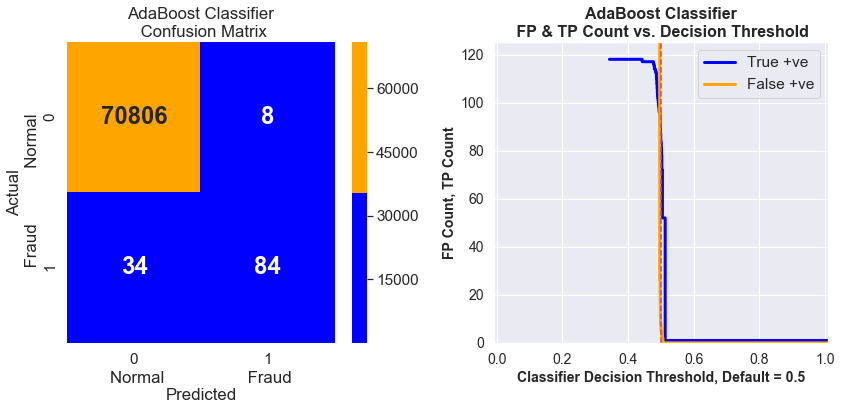

In [65]:
best_ADB_model = clf
y_pred, probs, F1_Score = GetResults('AdaBoost Classifier', best_ADB_model, x_test, y_test, P, N, 1, 0.5)

### This is an interesting probabilistic response on the decision threshold chart.  This could be inconsistent in predicting on different datasets on a day by day basis if, in fact the model decision is this tight between True and False.  The result may be a limitation of predict_proba on AdaBoost when its default base estimator is DecisionTree.

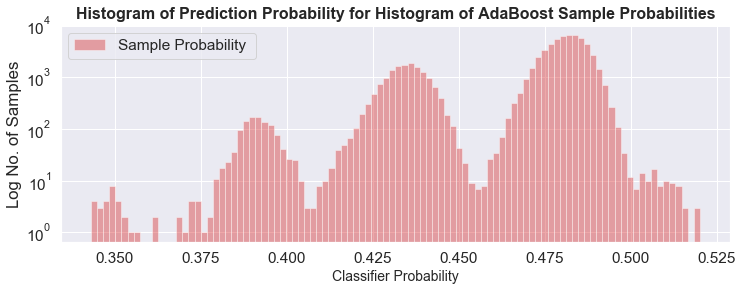

In [66]:
Prob_Hist('Histogram of AdaBoost Sample Probabilities',probs)

In [67]:
fpr_, tpr_, thresholds_ = roc_curve(y_test, probs[:,1])
FP_TP_Count_Table('AdaBoost Classifier', fpr_, tpr_, thresholds_, P, N, 30)

    ROC Curve TP & FP Count by Classifier Decision Threshold:    
                       AdaBoost Classifier                       

-----------------------------------------------------------------
    i   Threshold       TPR      TP Count      FPR       FP Count
-----------------------------------------------------------------
    0       1.520       0.000         0.0     0.0e+00         0.0
    1       0.520       0.008         1.0     0.0e+00         0.0
    2       0.506       0.441        52.0     0.0e+00         0.0
    3       0.506       0.441        52.0     2.8e-05         2.0
    4       0.503       0.610        72.0     2.8e-05         2.0
    5       0.503       0.610        72.0     4.2e-05         3.0
    6       0.503       0.661        78.0     4.2e-05         3.0
    7       0.503       0.661        78.0     5.6e-05         4.0
    8       0.502       0.686        81.0     5.6e-05         4.0
    9       0.502       0.686        81.0     7.1e-05         5.0
   10    

# *SVC*

In [68]:
params={'kernel':['rbf', 'linear', 'sigmoid'], 'C':[1, 2, 3]}

model = SVC(probability = True, max_iter = 1000, random_state = 6)
clf = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=2, verbose=1, return_train_score=True)

clf.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 15.0min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=1000, probability=True,
                                 random_state=6, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 2, 3],
                                        'kernel': ['rbf', 'linear', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=1)

In [69]:
clf.best_params_

{'kernel': 'rbf', 'C': 3}

{'C': 3, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': 1000, 'probability': True, 'random_state': 6, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVC gives AU_PRC of 0.803and F1 Score of 0.778



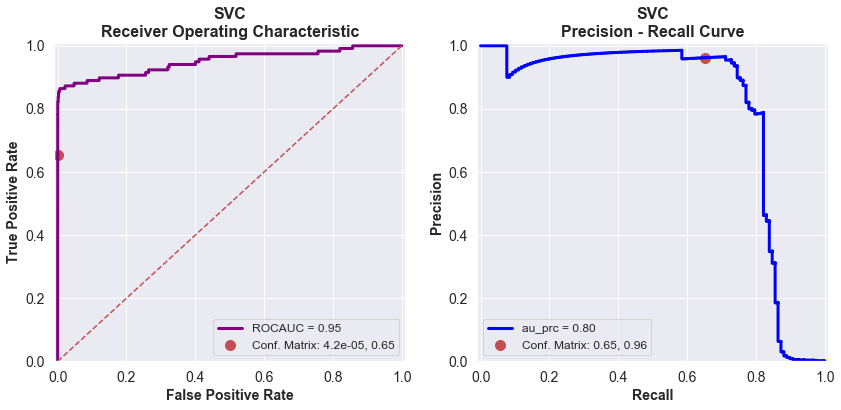

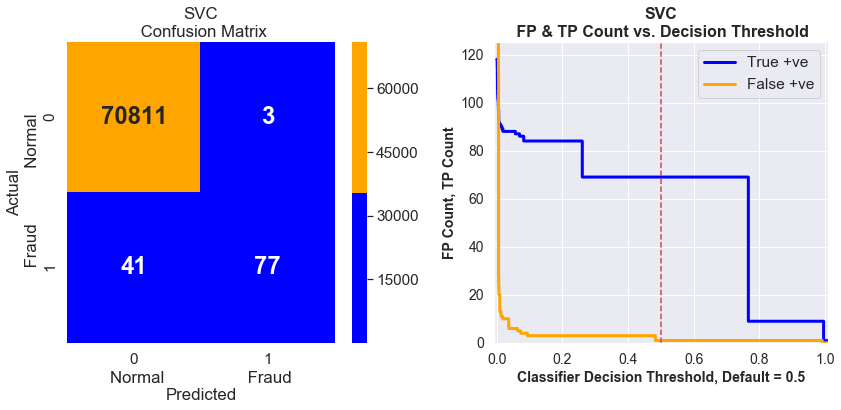

In [71]:
best_SVC_model = clf
y_pred, probs, F1_Score = GetResults('SVC', best_SVC_model, x_test, y_test, P, N, 1, 0.5)

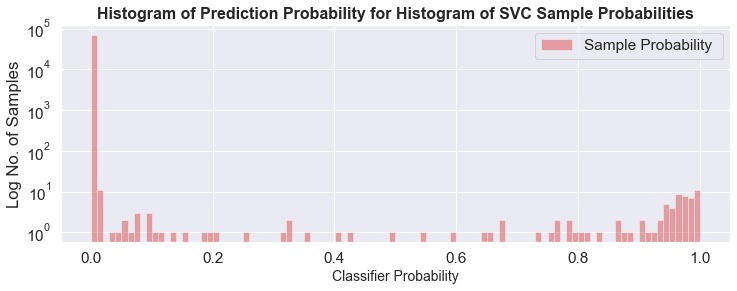

In [72]:
 Prob_Hist('Histogram of SVC Sample Probabilities',probs)   

## SVC only improved marginally from the initial default run.  The TP / FP Count chart is flat in the middle because the sample probabilities are heavily weighted to 0 and 1.

# *MLPClassifier*

In [81]:
params={'hidden_layer_sizes':[50,60,70,80,90,100,110,120], 'activation':['tanh','logistic','relu'],'solver':['lbfgs','sgd','adam']}

model =  MLPClassifier(batch_size = 1000, max_iter = 200,random_state = 6)
clf = RandomizedSearchCV(model, param_distributions=params, n_iter=20, cv=3, verbose=1, scoring = 'f1', return_train_score=True)

clf.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 12.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size=1000, beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                          

In [82]:
clf.best_params_

{'solver': 'adam', 'hidden_layer_sizes': 110, 'activation': 'tanh'}

 

MLP gives AU_PRC of 0.858and F1 Score of 0.856



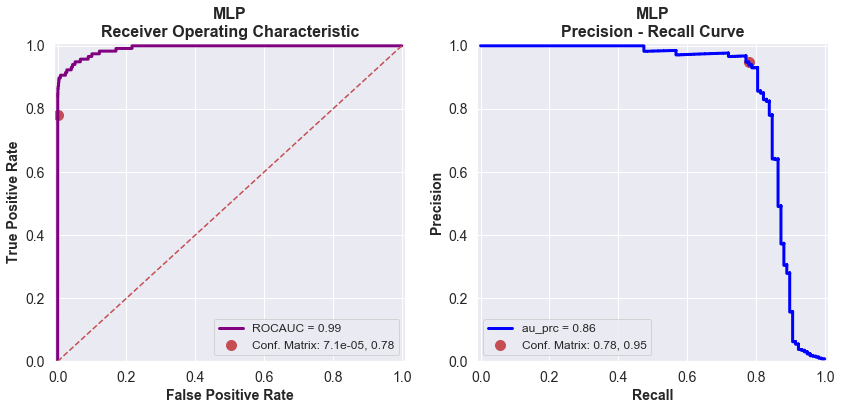

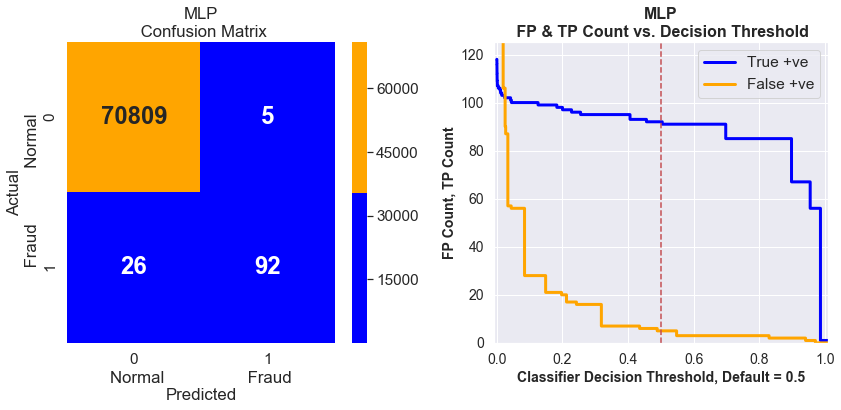

In [83]:
best_MLP_model = clf
y_pred, probs, F1_Score = GetResults('MLP', best_MLP_model, x_test, y_test, P, N, 2, 0.5)

## The MLP Classifier performance is on par with Random Forest.

## Evaluate RF & MLP on value of frauds detected, missed and misclassified.

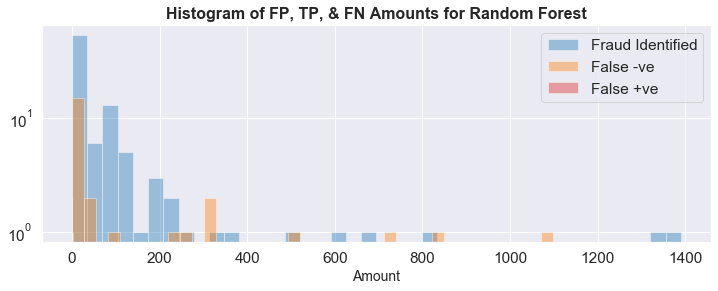

Fraud total identified is 9780.94,
Fraud total missed is 4545.95,
Normal total misclassified is 4.28


In [84]:
y_pred = best_RFC_model.predict(x_test)
Det_Amt_PLot('Random Forest', Test_Set, y_test, y_pred)

### RF found 68% of the fraud amount in the test set.

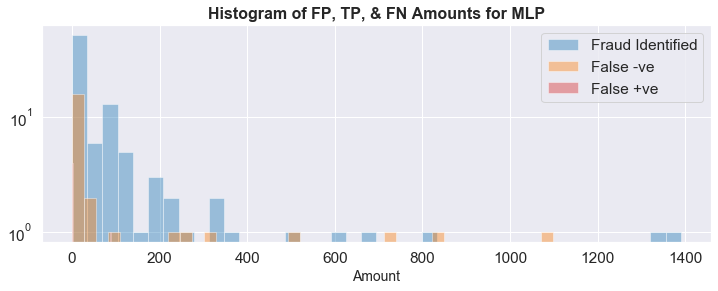

Fraud total identified is 10111.10,
Fraud total missed is 4215.79,
Normal total misclassified is 94.04


In [85]:
y_pred = best_MLP_model.predict(x_test)
Det_Amt_PLot('MLP', Test_Set, y_test, y_pred)

### MLP has almost the identical TP profile and found 3 more frauds reaching 71% of the fraud amount in the test set, however it misclassified a higher amount (FP's) which is still negligible considering the volume of samples. 

## *Reduced Features and Undersampling follow in Part B and Autoencoders in Part C.*